# Hyperopt: Space Configuration

One of the most valuable offers of Hyperopt is the flexibility it provides to create priors over the hyperparameters distributions.

Hyperopt offers:

- Multiple distributions
- Possibility to combine distributions
- Possibility to create nested spaces
- Multiple configuration ways including lists, dictionaries and tuples


## Distributions

Taken from [hp documentation](http://hyperopt.github.io/hyperopt/getting-started/search_spaces/) 

- **hp.choice**: returns one of several options (suitable for categorical hyperparams)
- **hp.randint**: returns a random integer between 0 and an upper limit
- **hp.uniform**: returns a value uniformly between specified limits
- **hp.quniform**: Returns a value like round(uniform(low, high) / q) * q

**hp.quniform** would be an equivalent of randint (if q=1), but the upper **and lower** limits can be specified. hp.quniform also offers the possibility to use bigger values of q. So if we search for the optimal number of trees in a random forest, we could search hp.quniform('n_estimators', 10, 1000, 50), in which case we would sample between 10 and 1000 trees in increments of 50.

- **hp.loguniform**: draws values from exp(uniform(low, high)) so that the logarithm of the returned value is uniformly distributed
- **hp.qloguniform**: Returns a value like round(exp(uniform(low, high)) / q) * q (similar use and cautions to hp.quniform but for log-uniform distributions)
- **hp.normal**: draws from a normal distribution with specified mu and sigma
- **hp.qnormal**: Returns a value like round(normal(mu, sigma) / q) * q
- **hp.lognormal**: Returns a value drawn according to exp(normal(mu, sigma)) so that the logarithm of the return value is normally distributed
- **hp.qlognormal**: Returns a value like round(exp(normal(mu, sigma)) / q) * q

### Important for q distributions
Another thing to notice is that q-distributions (qnormal, quniform, etc) return floats, where the value of the hyperparameter needs to be an integer (otherwise most models will return an error). Thus, some re-casting is necessary to pass this value to the models.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from hyperopt import hp
from hyperopt.pyll.stochastic import sample

# Distributions

## Numerical hyperparameters

In [2]:
# function to extract samples from the hyperparameter
# space and plot their distribution

def sample_and_plot(space, title):
    
    vals_ls = []
    
    for i in range(500):
        v = sample(space)
        v = v[0]['example']
        vals_ls.append(v)

    pd.Series(vals_ls).hist(bins=50)
    plt.title(title)
    plt.show()
    
    print('example values: ', vals_ls[0:5])

### randint

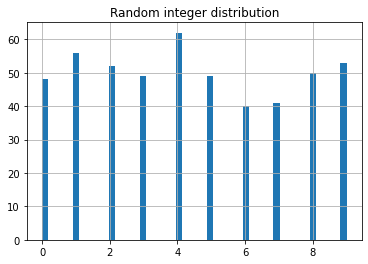

example values:  [array(6), array(2), array(8), array(5), array(6)]


In [3]:
# randint

space = [{'example' : hp.randint('example', 10)}]

sample_and_plot(space, 'Random integer distribution')

### uniform

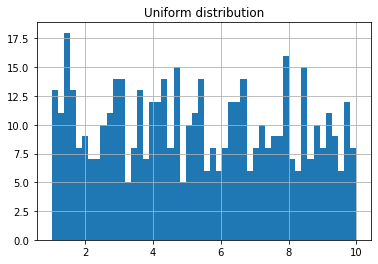

example values:  [6.59639143867988, 1.4787355344164879, 6.0132156954912475, 5.14300567828548, 4.092287150662922]


In [4]:
# uniform

space = [{'example' : hp.uniform('example', 1, 10)}]

sample_and_plot(space, 'Uniform distribution')

### quniform

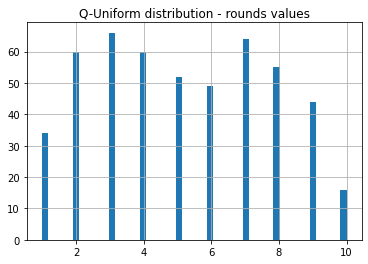

example values:  [1.0, 3.0, 3.0, 5.0, 8.0]


In [5]:
# quniform

space = [{'example' : hp.quniform('example', 1, 10, 1)}]

sample_and_plot(space, 'Q-Uniform distribution - rounds values')

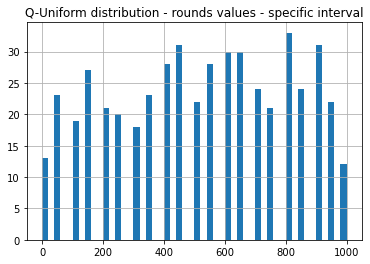

example values:  [550.0, 250.0, 850.0, 800.0, 800.0]


In [6]:
# with quniform we can change the limits (respect to randint)

space = [{'example' : hp.quniform('example', 10, 1000, 50)}]

sample_and_plot(space, 'Q-Uniform distribution - rounds values - specific interval')

### loguniform

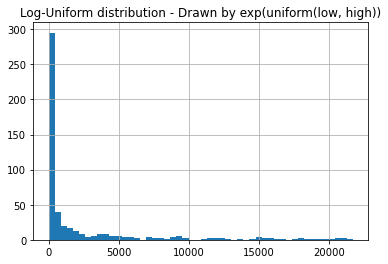

example values:  [3.693601018413406, 165.18482259485, 66.33724188695047, 7765.737686165167, 40.72285673976474]


In [7]:
# loguniform

space = [{'example' : hp.loguniform('example', 1, 10)}]

sample_and_plot(space, 'Log-Uniform distribution - Drawn by exp(uniform(low, high))')

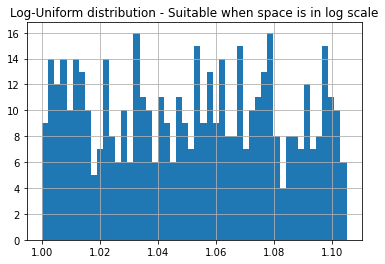

example values:  [1.0045197129715613, 1.02913210528966, 1.104124121003306, 1.0367933568892627, 1.0465513865667906]


In [8]:
# Attention, the use of loguniform for floats < 1 is unintuitive
# (at least for me)

space = [{'example' : hp.loguniform('example', 0.000001, 0.1)}]

sample_and_plot(space, 'Log-Uniform distribution - Suitable when space is in log scale')

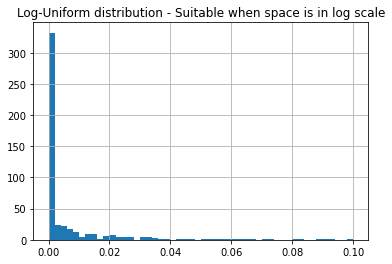

example values:  [0.020276450106595918, 8.742347086622068e-05, 2.438263545228069e-06, 8.187007287878273e-05, 0.009695336893695814]


In [9]:
# if we want a log distribution over 0.000001, 0.1
# we need to enter it like this:

space = [{'example' : hp.loguniform('example', np.log(0.000001), np.log(0.1))}]

sample_and_plot(space, 'Log-Uniform distribution - Suitable when space is in log scale')

### q log uniform

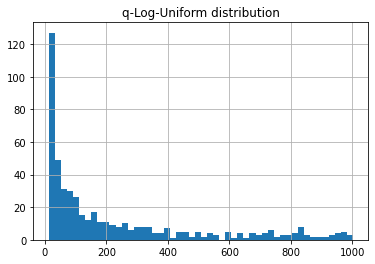

example values:  [641.5717728902159, 262.1055413636858, 19.56011502714073, 222.98531130940432, 250.36947234740134]


In [10]:
# qloguniform
# example we want to sample trees between 10 and 1000, in increments of 50
# but we think that better values are closer to smaller number of trees,
# so we want to sample more of those

space = [{'example': hp.qloguniform('example', np.log(10), np.log(1000), np.log(50))}]

sample_and_plot(space, 'q-Log-Uniform distribution')

### normal

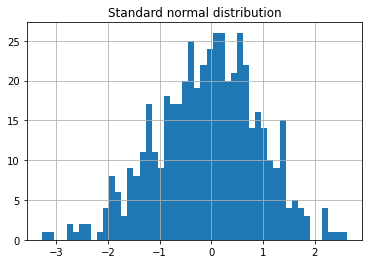

example values:  [-1.3195357459897854, -0.15087108044941352, 1.416616892346255, -0.44170430901004926, -0.023996961599720524]


In [11]:
# normal

# the standard normal
space = [{'example': hp.normal('example', 0, 1)}]

sample_and_plot(space, 'Standard normal distribution')

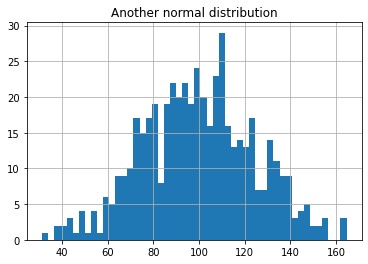

example values:  [91.77777780413346, 104.52000111967203, 116.24418873490889, 101.62502298410314, 66.8127420724104]


In [12]:
# normal

space = [{'example': hp.normal('example', 100, 25)}]

sample_and_plot(space, 'Another normal distribution')

### q normal

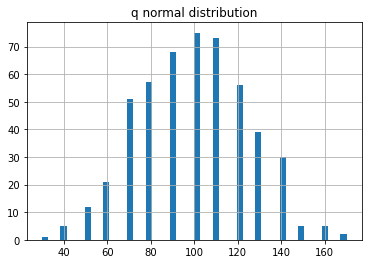

example values:  [140.0, 90.0, 150.0, 50.0, 130.0]


In [12]:
# qnormal
# same as previous but at discrete intervals

space = [{'example': hp.qnormal('example', 100, 25, 10)}]

sample_and_plot(space, 'q normal distribution')

### log normal

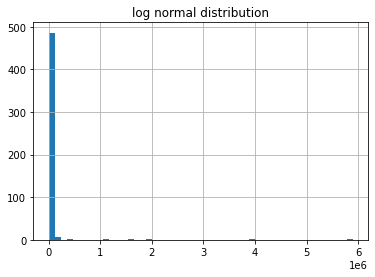

example values:  [1.5666213169535321, 67.61735156320944, 4173.412458983026, 18.413599821659663, 47.775174392067335]


In [13]:
# lognormal

space = [{'example': hp.lognormal('example', np.log(100), np.log(25))}]

sample_and_plot(space, 'log normal distribution')

### q log normal

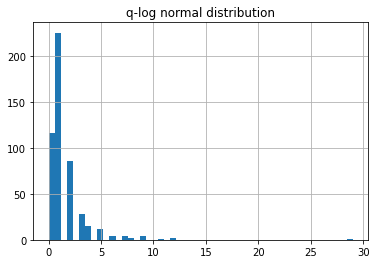

example values:  [0.0, 3.0, 5.0, 0.0, 5.0]


In [14]:
# q-lognormal

space = [{'example': hp.qlognormal('example', 0, 1, 1)}]

sample_and_plot(space, 'q-log normal distribution')

## Categorical hyperparameters

In [15]:
def sample_and_plot(space, title):
    
    vals_ls = []
    
    for i in range(500):
        v = sample(space)
        v = v[0]['example']
        vals_ls.append(v)

    pd.Series(vals_ls).value_counts().plot.bar()
    plt.title(title)
    plt.ylabel('Number of draws')
    plt.show()
    
    print('example values: ', vals_ls[0:5])

### choice

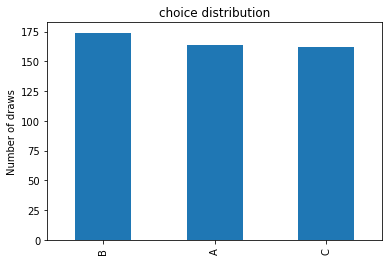

example values:  ['C', 'C', 'B', 'C', 'A']


In [16]:
# choice

space = [{'example': hp.choice('example', ['A', 'B', 'C'])}]

sample_and_plot(space, 'choice distribution')

### pchoice

Draws from a list with a user specified probability.

In [17]:
# pchoice

# example from the Hyperopt article

space = hp.pchoice('example', [
    (0.8, {'use_var': 'x', 'x': hp.normal('x', 0, 1)}),
    (0.2, {'use_var': 'y', 'y': hp.uniform('y', 1, 3)})])

In [18]:
# draw samples from space

for i in range(20):
        v = sample(space)
        print(v)

{'use_var': 'x', 'x': 1.1392490260981176}
{'use_var': 'x', 'x': 0.7310944705640101}
{'use_var': 'x', 'x': -0.37754629271375156}
{'use_var': 'x', 'x': 1.6660778965739302}
{'use_var': 'x', 'x': -0.5419948004047654}
{'use_var': 'x', 'x': 0.9907842934531121}
{'use_var': 'x', 'x': 0.7114384564080403}
{'use_var': 'y', 'y': 2.3771346176037476}
{'use_var': 'y', 'y': 2.053312149150603}
{'use_var': 'x', 'x': -0.15608812727808413}
{'use_var': 'x', 'x': 0.34715494999450575}
{'use_var': 'x', 'x': -2.8129271909426596}
{'use_var': 'y', 'y': 2.7915259579589895}
{'use_var': 'x', 'x': 0.0021690178499514236}
{'use_var': 'x', 'x': -0.4725941390220825}
{'use_var': 'x', 'x': -0.10190248229455316}
{'use_var': 'x', 'x': 1.0964602423878536}
{'use_var': 'x', 'x': 0.3015823227380304}
{'use_var': 'x', 'x': 0.5958284721426494}
{'use_var': 'x', 'x': 1.0820690265315671}


In [19]:
# our own example, realistic, 

# if we want to sample
# a loss function but think that deviance is likely better
# than exponential

space = hp.pchoice('example', [
    (0.8, {'loss': 'deviance'}),
    (0.2, {'loss': 'exponential'})])

# draw samples from space

for i in range(20):
        v = sample(space)
        print(v)

{'loss': 'deviance'}
{'loss': 'exponential'}
{'loss': 'deviance'}
{'loss': 'deviance'}
{'loss': 'exponential'}
{'loss': 'deviance'}
{'loss': 'deviance'}
{'loss': 'deviance'}
{'loss': 'deviance'}
{'loss': 'deviance'}
{'loss': 'deviance'}
{'loss': 'deviance'}
{'loss': 'exponential'}
{'loss': 'exponential'}
{'loss': 'exponential'}
{'loss': 'deviance'}
{'loss': 'deviance'}
{'loss': 'deviance'}
{'loss': 'exponential'}
{'loss': 'deviance'}


In [20]:
# our own example, continuing from choice

space = hp.pchoice('example', [
    (0.8, {'use_var': 'x', 'x': hp.choice('a', ['A', 'B'])}),
    (0.2, {'use_var': 'y', 'y': hp.choice('a', ['C', 'D'])})])

In [21]:
# draw samples from space

for i in range(20):
        v = sample(space)
        print(v)

{'use_var': 'x', 'x': 'A'}
{'use_var': 'x', 'x': 'A'}
{'use_var': 'x', 'x': 'A'}
{'use_var': 'x', 'x': 'A'}
{'use_var': 'x', 'x': 'B'}
{'use_var': 'x', 'x': 'A'}
{'use_var': 'y', 'y': 'D'}
{'use_var': 'x', 'x': 'A'}
{'use_var': 'x', 'x': 'A'}
{'use_var': 'x', 'x': 'B'}
{'use_var': 'y', 'y': 'D'}
{'use_var': 'x', 'x': 'A'}
{'use_var': 'x', 'x': 'B'}
{'use_var': 'x', 'x': 'A'}
{'use_var': 'x', 'x': 'B'}
{'use_var': 'y', 'y': 'D'}
{'use_var': 'x', 'x': 'B'}
{'use_var': 'x', 'x': 'A'}
{'use_var': 'x', 'x': 'B'}
{'use_var': 'x', 'x': 'B'}


In [22]:
# capture data in a dataframe

vals_ls = []
for i in range(500):
        v = sample(space)
        vals_ls.append(v)
        
v = pd.DataFrame(vals_ls)
v.head()

,use_var,y,x
0,y,D,NaN
1,y,C,NaN
2,x,NaN,B
3,x,NaN,B
4,x,NaN,A


In [23]:
v['use_var'].value_counts(normalize=True)

x    0.78
y    0.22
Name: use_var, dtype: float64

In [24]:
v['x'].value_counts(normalize=True, dropna=True)

B    0.507692
A    0.492308
Name: x, dtype: float64

In [25]:
v['x'].value_counts(normalize=True, dropna=False)

B      0.396
A      0.384
NaN    0.220
Name: x, dtype: float64

In [26]:
v['y'].value_counts(normalize=True)

C    0.545455
D    0.454545
Name: y, dtype: float64

In [27]:
v['y'].value_counts(normalize=True, dropna=False)

NaN    0.78
C      0.12
D      0.10
Name: y, dtype: float64

## Nested spaces

In [28]:
space = hp.choice('classifier_type', [
    {
        'type': 'naive_bayes',
    },
    {
        'type': 'svm',
        'C': hp.lognormal('svm_C', 0, 1),
        'kernel': hp.choice('svm_kernel', [
            {'ktype': 'linear'},
            {'ktype': 'RBF', 'width': hp.lognormal('svm_rbf_width', 0, 1)},
            ]),
    },
    {
        'type': 'dtree',
        'criterion': hp.choice('dtree_criterion', ['gini', 'entropy']),
        'max_depth': hp.choice('dtree_max_depth',
            [None, hp.qlognormal('dtree_max_depth_int', 3, 1, 1)]),
        'min_samples_split': hp.qlognormal('dtree_min_samples_split', 2, 1, 1),
    },
    ])

In [29]:
for i in range(20):
        v = sample(space)
        print(v)
        print()

{'criterion': 'gini', 'max_depth': None, 'min_samples_split': 5.0, 'type': 'dtree'}

{'criterion': 'entropy', 'max_depth': 55.0, 'min_samples_split': 13.0, 'type': 'dtree'}

{'type': 'naive_bayes'}

{'type': 'naive_bayes'}

{'type': 'naive_bayes'}

{'type': 'naive_bayes'}

{'criterion': 'gini', 'max_depth': 20.0, 'min_samples_split': 6.0, 'type': 'dtree'}

{'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 21.0, 'type': 'dtree'}

{'C': 0.35905441755395967, 'kernel': {'ktype': 'RBF', 'width': 2.181160752245544}, 'type': 'svm'}

{'criterion': 'gini', 'max_depth': None, 'min_samples_split': 30.0, 'type': 'dtree'}

{'type': 'naive_bayes'}

{'criterion': 'gini', 'max_depth': 9.0, 'min_samples_split': 8.0, 'type': 'dtree'}

{'criterion': 'gini', 'max_depth': 8.0, 'min_samples_split': 3.0, 'type': 'dtree'}

{'criterion': 'gini', 'max_depth': 14.0, 'min_samples_split': 10.0, 'type': 'dtree'}

{'C': 1.1102851298894172, 'kernel': {'ktype': 'RBF', 'width': 1.0043094853081862}, 'type